In [71]:
''' Let's first import our dependency and read the data'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [72]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [73]:
''' Finding the unique values for fuel type , owner , transmission and seller type column'''
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [74]:
'''Lets also try to find out how many type of cars we have in the data'''
print('The total number of type of cars in the data is...')
print(len(df['Car_Name'].unique()))

The total number of type of cars in the data is...
98


In [75]:
''' Lets check the missing values in the data '''
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [76]:
''' Let's check the description of the data'''
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [77]:
''' Let's check the maximum and minimum selling price'''
print(max(df['Selling_Price']))
print(min(df['Selling_Price']))

35.0
0.1


In [78]:
'''Let's check the shape of the data'''
df.shape

(301, 9)

In [79]:
''' We can see that in the year column the car manufacturing year is written. Now based on that 
we can derive a column that will state how old the cars are. It simply will substract the year present
in the data with the current year'''
df['Car_Age'] = 2022 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [80]:
'''Now we can drop the year column from our data'''
df.drop(['Year'],axis = 1, inplace= True)


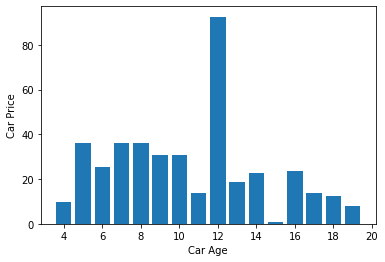

In [81]:
'''Lets find relation between car age and price'''
plt.bar(df['Car_Age'],df['Present_Price'])
plt.xlabel('Car Age')
plt.ylabel('Car Price')
plt.show()

In [82]:
'''Let's find out how each car's sell value increased'''
df['Value_Growth'] = df['Present_Price'] - df['Selling_Price']

In [83]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Value_Growth
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8,2.24
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9,4.79
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5,2.60
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11,1.30
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8,2.27


In [84]:
'''Lets find out what type of car is mostly present in our dataset'''
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

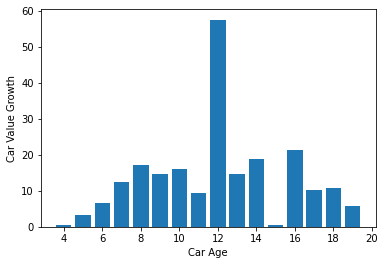

In [85]:
'''Lets draw a relationship between value growth and car age'''
plt.bar(df['Car_Age'],df['Value_Growth'])
plt.xlabel('Car Age')
plt.ylabel('Car Value Growth')
plt.show()

In [86]:
'''We can see that in both viz that the cars aged 12 has highest value growth , let's get the car names'''
car_12 = df[(df['Car_Age']==12)]
car_12.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Value_Growth
19,sx4,2.65,7.98,41442,Petrol,Dealer,Manual,0,12,5.33
28,alto k10,1.95,3.95,44542,Petrol,Dealer,Manual,0,12,2.00
57,corolla altis,4.75,18.54,50000,Petrol,Dealer,Manual,0,12,13.79
67,fortuner,9.25,20.45,59000,Diesel,Dealer,Manual,0,12,11.20
78,corolla altis,5.25,22.83,80000,Petrol,Dealer,Automatic,0,12,17.58


In [87]:
car_12['Car_Name'].value_counts()

corolla altis             2
fortuner                  2
sx4                       1
alto k10                  1
land cruiser              1
Bajaj Pulsar 220 F        1
Bajaj Avenger 220 dtsi    1
Honda Karizma             1
TVS Wego                  1
Honda CB twister          1
i20                       1
jazz                      1
city                      1
Name: Car_Name, dtype: int64

In [88]:
''' Let's drop the car name as that doesn't help in predicting the car price'''
df.drop(['Car_Name'],axis = 1, inplace= True)

In [89]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Value_Growth
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8,2.24
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9,4.79
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5,2.60
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11,1.30
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8,2.27


In [90]:
''' Now our goal will be to convert our categorical features in numerical ones'''
df = pd.get_dummies(df)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Value_Growth,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,2.24,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,4.79,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,2.60,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,1.30,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,2.27,0,1,0,1,0,0,1


In [91]:
'''Lets find the co relation between all the features'''
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Value_Growth,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.520881,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.864902,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.333832,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,0.107415,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,0.333746,0.017790,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Value_Growth,0.520881,0.864902,0.333832,0.107415,0.333746,1.000000,0.005901,0.265881,-0.263835,0.336902,-0.336902,0.237802,-0.237802
Fuel_Type_CNG,-0.025164,-0.011500,0.012223,-0.014272,0.017790,0.005901,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,0.265881,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.263835,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.336902,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240


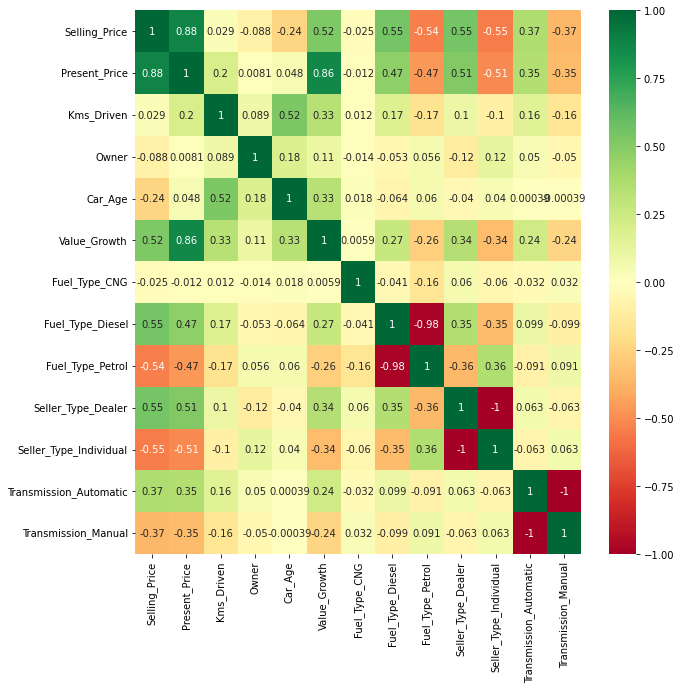

In [92]:
''' Lets visualize the co relation'''
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap = 'RdYlGn')

In [93]:
''' Now lets divide our data in dependent and indepenedent variables '''
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [94]:
''' Lets have a look into the divided data'''
x.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Value_Growth,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,8,2.24,0,0,1,1,0,0,1
1,9.54,43000,0,9,4.79,0,1,0,1,0,0,1
2,9.85,6900,0,5,2.60,0,0,1,1,0,0,1
3,4.15,5200,0,11,1.30,0,0,1,1,0,0,1
4,6.87,42450,0,8,2.27,0,1,0,1,0,0,1


In [95]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [96]:
'''Lets try to find out features we have in the data alongside it;s importance'''
from sklearn.ensemble import ExtraTreesRegressor
model_en = ExtraTreesRegressor()
model_en.fit(x,y)

ExtraTreesRegressor()

In [97]:
''' Now it's important to understand what the model is doing here , we know that in the y data we only have 
the depnedent variable which is thselling price in this case , abnd here we will try to find the features 
that is present in the x and it's underlying importance while predicting the dependent variable. In the 
output we will get a numerical point denoting that particular feature's significance while determining 
our dependent variable'''
print(model_en.feature_importances_)

[3.81420551e-01 2.67222090e-02 3.57232783e-04 6.26606485e-02
 6.49859313e-02 5.63291804e-05 1.98499864e-01 2.00920216e-02
 1.14187120e-01 3.95058309e-03 6.24541608e-02 6.46133489e-02]


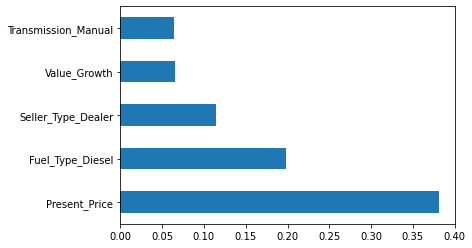

In [98]:
''' Lets plot our feature importance in a graph and see top 5 important features'''
feature_importance_model = pd.Series(model_en.feature_importances_, index = x.columns)
feature_importance_model.nlargest(5).plot(kind = 'barh')
plt.show()

In [99]:
'''Now to scale our x data for modeeling we need to use standard scaler so that the unit and it's values are 
aligned'''
object = StandardScaler()
X = object.fit_transform(x)

In [100]:
x = pd.DataFrame(X, columns = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Value_Growth',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'])

In [101]:
''' Lets do the train test split'''
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [103]:
print(f'the training data shape for x data is {xtrain.shape}')
print(f'the training data shape for y data is {ytrain.shape}')
print(f'the test data shape for x data is {xtest.shape}')
print(f'the test data shape for y data is {ytest.shape}')

the training data shape for x data is (240, 12)
the training data shape for y data is (240,)
the test data shape for x data is (61, 12)
the test data shape for y data is (61,)


In [104]:
x.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Value_Growth,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,-0.236215,-0.256224,-0.174501,-0.128897,-0.150843,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
1,0.221505,0.155911,-0.174501,0.217514,0.378121,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148
2,0.257427,-0.773969,-0.174501,-1.168129,-0.076166,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
3,-0.403079,-0.817758,-0.174501,0.910335,-0.345834,-0.081786,-0.498962,0.509327,0.737285,-0.737285,-0.39148,0.39148
4,-0.087890,0.141743,-0.174501,-0.128897,-0.144620,-0.081786,2.004162,-1.963374,0.737285,-0.737285,-0.39148,0.39148


In [105]:
''' Lets build the model now'''
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(xtrain,ytrain)

In [107]:
''' lets check the scores'''
model_lr.score(xtrain,ytrain)

1.0

In [108]:
model_lr.score(xtest,ytest)

1.0

In [109]:
ypred = model_lr.predict(xtest)

In [110]:
residual = ypred-ytest
print(residual)

285    0.000000e+00
248    2.664535e-15
150   -1.776357e-15
217    3.996803e-15
107    8.881784e-16
           ...     
62    -1.421085e-14
154    8.881784e-16
218    3.552714e-15
286    5.329071e-15
186   -8.881784e-15
Name: Selling_Price, Length: 61, dtype: float64


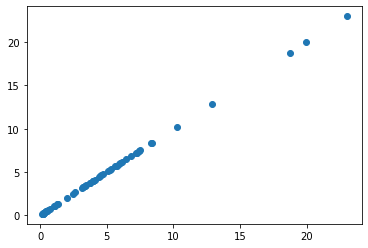

In [112]:
plt.scatter(ypred,ytest)

In [116]:
ypred

array([ 7.4 ,  4.  ,  0.5 ,  3.15,  1.25,  5.75,  0.75,  2.65,  8.4 ,
        0.48,  8.35,  3.45,  5.3 ,  4.1 ,  0.2 ,  0.35,  6.85,  6.15,
        5.11,  7.45,  6.  ,  3.25,  5.25,  7.5 ,  2.5 ,  3.25,  3.35,
        0.6 ,  0.3 ,  0.35,  0.3 ,  0.16,  4.4 , 19.99, 23.  ,  4.75,
        3.75,  1.05,  0.2 ,  4.5 , 10.25, 12.9 ,  0.2 ,  4.6 ,  3.95,
        3.75,  7.2 ,  5.95,  7.25,  1.35,  3.35,  0.48,  2.  ,  4.  ,
        1.1 ,  0.2 , 18.75,  0.5 ,  6.45,  5.65,  0.25])

In [117]:
ytest

285     7.40
248     4.00
150     0.50
217     3.15
107     1.25
       ...  
62     18.75
154     0.50
218     6.45
286     5.65
186     0.25
Name: Selling_Price, Length: 61, dtype: float64